# Movie review classification

Kaggle competetion: Movie review classification

    Original dataset: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?datasetId=134715&sortBy=voteCount

The tasks are to:

    We aim to classify movie reviews as either positive or negative based on their textual content.
    Distinguish between Positive - 1, Negative - 0 movie review using various models

Potential ML Models:

    Logistic Regression
    Naive Bayes
    Support Vector Machines (SVM)

Part-1: Data Overview

    The "IMDB Dataset.csv" is a dataset of 50,000 movie reviews in English, with an equal number of positive and negative reviews. Each review is represented as a string of text, and each review is labeled as either "positive" or "negative" based on its sentiment.
    Load the dataset using pandas and preview the top 5 rows.
    Print the shape and attributes of the dataset.
    Generate descriptive statistics and analyze the columns to see the data types and missing values.
    Check if the data is balanced and plot the count of positive and negative reviews.
    Visualize the distribution of the length of the reviews using a histogram.

Part-2: Data Preprocessing

    import the necessary libraries
    load the data into a pandas DataFrame
    convert the sentiment labels in the sentiment column from strings to binary values and the string labels "positive" and "negative" are replaced by the binary values 1 and 0
    preprocess the textual data using the CountVectorizer, removes stop words and converting text to lowercase
    store the sentiment labels of the reviews in a separate variable 'y'
    split the data into training and testing sets using the train_test_split() function

Part-3.1: 
    
    Algorithm 1 (Logistic Regression)

Part-3.2: 
    
    Algorithm 2 (Naive Bayes)

Part-3.3: 
    
    Algorithm 3 (Support Vector Machine -- SVM)

Part-4: 
   
    Model Comparison and Conclusion

# Imports libraries

In [329]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from wordcloud import WordCloud




# Part-1: Data overview

Load and explore the data

In [330]:
# load the data into a pandas DataFrame using the read_csv() function
data = pd.read_csv("/Users/whatnameishoulduse/Desktop/33002_23w_p2-suliang-uchicago/IMDB Dataset.csv")
# preview the top-5 rows of the data
data.head(5)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [331]:
print('Shape:', data.shape)

Shape: (50000, 2)


In [332]:
# attribute for each data sample
print('Attributes:', data.columns)


Attributes: Index(['review', 'sentiment'], dtype='object')


In [333]:
# generate descriptive statistics for the data
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [334]:
# Analyze the columns to see the data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [335]:
# check if the data is balanced
data.sentiment.value_counts()


positive    25000
negative    25000
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

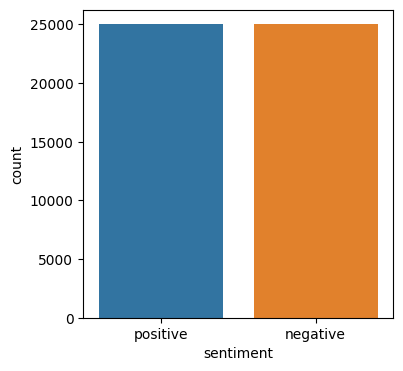

In [336]:
plt.figure(figsize=(4, 4)) # set the size of the figure
sns.countplot(x='sentiment', data=data) # plot the countplot

<Axes: >

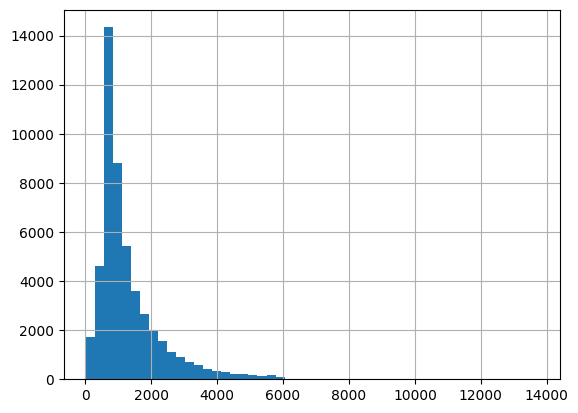

In [337]:
# visualize the distribution of the length of the reviews
data['review_length'] = data['review'].apply(len)
data['review_length'].hist(bins=50)




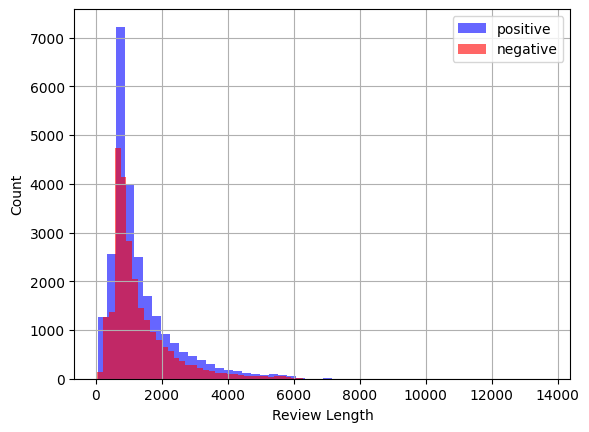

In [338]:
# hisogram of positive reviews and negative reviews separately
data[data['sentiment'] == 'positive']['review_length'].hist(bins=50, color='blue', label='positive', alpha=0.6)
data[data['sentiment'] == 'negative']['review_length'].hist(bins=50, color='red', label='negative', alpha=0.6)
plt.legend()
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()


# Part-2: Data Preprocessing

In this section, we focus on making the data reay to use for ML models. It includes:

    convert the sentiment labels in the sentiment column from strings to binary values and the string labels "positive" and "negative" are replaced by the binary values 1 and 0;

    preprocess the textual data using the CountVectorizer, removes stop words and converting text to lowercase;

    using fit_transform() method of the CountVectorizer object transforms the textual data into a matrix of token counts;

    store the sentiment labels of the reviews in a separate variable y;

    split the data into 80% training data and 20% testing data using the train_test_split() function with a fixed random seed for reproducibility.
    

Convert the sentiment labels in the sentiment column from strings to binary values and the string labels "positive" and "negative" are replaced by the binary values 1 and 0.

In [341]:
data["sentiment"] = data["sentiment"].map({'positive': 1, 'negative': 0})

Preprocess the textual data using the CountVectorizer, removes stop words and converting text to lowercase.

In [342]:

vectorizer = CountVectorizer(stop_words='english', lowercase=True)


Using fit_transform() method of the CountVectorizer object transforms the textual data into a matrix of token counts.

In [343]:
X = vectorizer.fit_transform(data["review"])

Store the sentiment labels of the reviews in a separate variable y.

In [344]:
y = data["sentiment"]

Split the data into 80% training data and 20% testing data using the train_test_split() function with a fixed random seed for reproducibility.

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Part-3.1: Algorithm 1 (Logistic Regression)

we will use logistic regression as our classification model and we will use the default parameters settings in this model


In [346]:
# create a logistic regression model, set the maximum number of iterations to 1000 and fit it to the training data 
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [347]:
# evaluate the model on the test data
logreg.score(X_test, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


Our logistic regression model achieves an accuracy of around 88% on the testing data.

In [348]:
# use np.array(vectorizer.get_feature_names_out()) to obtain an array of the feature names after vectorizing the textual data using a vectorizer objec
feature_names = np.array(vectorizer.get_feature_names_out())


In [349]:
# coefficients for the logistic regression model
coefficients = logreg.coef_[0]
coefficients

array([-8.58144480e-03, -2.09122201e-01, -3.49181266e-02, ...,
       -1.55504764e-05, -6.26865565e-02, -6.26865565e-02])

In [350]:
# sort the coefficients from the model using argsort
sorted_coef_index = logreg.coef_[0].argsort()

In [351]:
# get the top coefficients features for the positive class
top_positive_coefficients = feature_names[sorted_coef_index[:10]]
print('Top positive coefficients:\n{}\n'.format(top_positive_coefficients))


Top positive coefficients:
['waste' 'disappointment' 'worst' 'uninteresting' 'mst3k' 'awful'
 'disappointing' 'poorly' 'forgettable' 'boredom']



In [352]:
# get the top coefficients features for the negative class
top_negative_coefficients = feature_names[sorted_coef_index[:-11:-1]]
print('Top negative coefficients:\n{}\n'.format(top_negative_coefficients))

Top negative coefficients:
['refreshing' 'hooked' 'disappoint' 'funniest' 'underrated' 'dismiss'
 'pleased' 'apocalyptic' 'wonderfully' 'ringwald']



Examine some examples where the classifier fails to make correct predictions

In [353]:
# get the predictions for the test data
y_pred = logreg.predict(X_test)

In [354]:
# test samples that were incorrectly classified
test_sample = X_test[y_pred != y_test]


In [355]:
# predicted labels for the test samples that were incorrectly classified
predicted_labels = y_pred[y_pred != y_test]


In [356]:
# true labels for the test samples that were incorrectly classified
true_labels = y_test[y_pred != y_test]

In [357]:
# print the example test samples and their predicted/true labels
for i in range(5):
    print('Test sample {} (true label: {}): \n{}\n'.format(i+1, true_labels.iloc[i], test_sample[i]))
    print('Predicted label: {}\n'.format(predicted_labels[i]))
    

Test sample 1 (true label: 1): 
  (0, 48334)	2
  (0, 54821)	2
  (0, 90676)	1
  (0, 73161)	1
  (0, 39191)	1
  (0, 56134)	3
  (0, 45975)	2
  (0, 63745)	1
  (0, 52602)	1
  (0, 57)	1
  (0, 53434)	2
  (0, 99856)	1
  (0, 9984)	1
  (0, 9700)	1
  (0, 11670)	1
  (0, 90702)	1
  (0, 49391)	1
  (0, 43284)	1
  (0, 52606)	1
  (0, 24913)	1
  (0, 59406)	1
  (0, 91241)	2
  (0, 73213)	1
  (0, 55157)	2
  (0, 90883)	1
  :	:
  (0, 21905)	1
  (0, 56139)	1
  (0, 94110)	1
  (0, 100723)	2
  (0, 9995)	1
  (0, 85527)	1
  (0, 73032)	1
  (0, 100187)	1
  (0, 51599)	2
  (0, 46621)	1
  (0, 23315)	1
  (0, 12384)	1
  (0, 37971)	1
  (0, 26399)	1
  (0, 40607)	1
  (0, 24830)	1
  (0, 47172)	1
  (0, 87118)	2
  (0, 53927)	3
  (0, 53914)	1
  (0, 39467)	1
  (0, 88978)	1
  (0, 40985)	1
  (0, 11655)	1
  (0, 41463)	1

Predicted label: 0

Test sample 2 (true label: 1): 
  (0, 57407)	1
  (0, 48334)	1
  (0, 30033)	1
  (0, 11989)	8
  (0, 90149)	1
  (0, 31709)	1
  (0, 22908)	1
  (0, 78290)	1
  (0, 20547)	1
  (0, 97942)	1
  (0, 38194)	

In [358]:
# create a confusion matrix
confusion_matrix(y_test, y_pred)

array([[4350,  611],
       [ 559, 4480]])

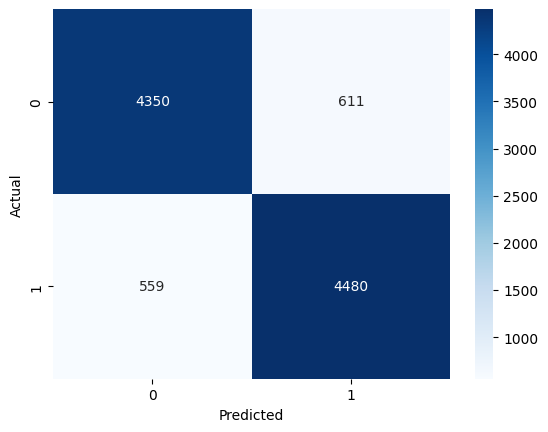

In [359]:
# create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [360]:
# print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4961
           1       0.88      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Interpret the results: 

The precision for class 0 is 0.89, which means that out of all the predicted negative reviews, 89% of them were actually negative. The recall for class 0 is 0.88, which means that out of all the actual negative reviews, 88% of them were correctly classified as negative.

The precision for class 1 is 0.88, which means that out of all the predicted positive reviews, 88% of them were actually positive. The recall for class 1 is 0.89, which means that out of all the actual positive reviews, 89% of them were correctly classified as positive.

The F1-score is a harmonic mean of precision and recall. For both classes, the F1-score is 0.88. This indicates that the model is performing well on both classes.

The support for class 0 is 4961, which means that there are 4961 negative reviews in the test data. The support for class 1 is 5039, which means that there are 5039 positive reviews in the test data. The overall support for the test data is 10000, which is the sum of the supports for both classes.


# Part-3.2: Algorithm 2 (Naive Bayes)

Create a Naive Bayes model and fit it on the training data

In [361]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [362]:
# evaluate the model on the test data
nb_model.score(X_test, y_test)
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(nb_model.score(X_test, y_test)))

Accuracy of Naive Bayes classifier on test set: 0.86


Result analysis:

Our Naive Bayes model achieves an accuracy of around 86% on the testing data.

In [363]:
# get the predictions for the test data
y_pred = nb_model.predict(X_test)

In [364]:
# test samples that were incorrectly classified
test_sample = X_test[y_pred != y_test]

In [365]:
# predicted labels for the test samples that were incorrectly classified
predicted_labels = y_pred[y_pred != y_test]

In [366]:
# true labels for the test samples that were incorrectly classified
true_labels = y_test[y_pred != y_test]

In [367]:
# print the example test samples and their predicted/true labels
for i in range(5):
    print('Test sample {} (true label: {}): \n{}\n'.format(i+1, true_labels.iloc[i], test_sample[i]))
    print('Predicted label: {}\n'.format(predicted_labels[i]))

Test sample 1 (true label: 1): 
  (0, 57407)	1
  (0, 48334)	1
  (0, 30033)	1
  (0, 11989)	8
  (0, 90149)	1
  (0, 31709)	1
  (0, 22908)	1
  (0, 78290)	1
  (0, 20547)	1
  (0, 97942)	1
  (0, 38194)	1
  (0, 52288)	1
  (0, 90676)	3
  (0, 79821)	1
  (0, 52509)	2
  (0, 73161)	1
  (0, 68876)	1
  (0, 96113)	1
  (0, 8439)	1
  (0, 86906)	1
  (0, 37834)	2
  (0, 52602)	4
  (0, 66940)	3
  (0, 24957)	1
  (0, 88548)	1
  :	:
  (0, 13057)	2
  (0, 33839)	1
  (0, 66326)	1
  (0, 3732)	1
  (0, 26102)	1
  (0, 77679)	1
  (0, 4946)	1
  (0, 41313)	2
  (0, 20461)	1
  (0, 59337)	2
  (0, 99021)	1
  (0, 57183)	1
  (0, 44012)	1
  (0, 43458)	1
  (0, 19685)	1
  (0, 33544)	1
  (0, 33342)	2
  (0, 57573)	1
  (0, 73360)	1
  (0, 93224)	1
  (0, 71551)	1
  (0, 49281)	2
  (0, 45277)	1
  (0, 45274)	1
  (0, 1614)	1

Predicted label: 0

Test sample 2 (true label: 1): 
  (0, 11989)	4
  (0, 78290)	1
  (0, 99920)	1
  (0, 68563)	1
  (0, 45975)	1
  (0, 60055)	4
  (0, 9700)	1
  (0, 2321)	1
  (0, 49391)	1
  (0, 67057)	1
  (0, 18664)	1


In [368]:
# create a confusion matrix
confusion_matrix(y_test, y_pred)

array([[4344,  617],
       [ 817, 4222]])

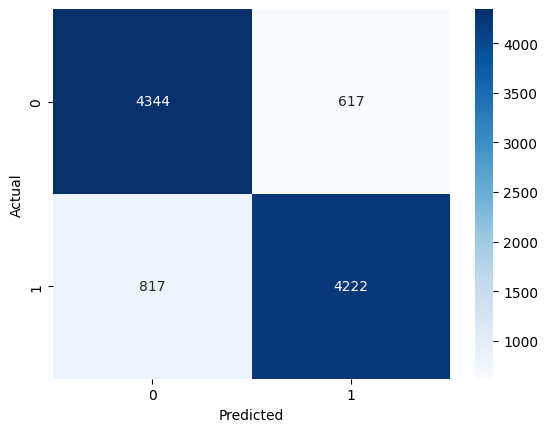

In [369]:
# create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [370]:

# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4961
           1       0.87      0.84      0.85      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Interpret the results: 

This looks like the classification report for a binary classification problem with two classes, 0 and 1. The precision, recall, and f1-score for each class are reported, as well as the support for each class, which is the number of samples in the test set that belong to that class.

In this case, the class 0 has a precision of 0.84, recall of 0.88, and f1-score of 0.86, while the class 1 has a precision of 0.87, recall of 0.84, and f1-score of 0.85.

The accuracy of the model on the test set is reported to be 0.86, which means that the model correctly classified 86% of the samples in the test set.

The macro average of the precision, recall, and f1-score is also reported, which is the average of these metrics across both classes. The weighted average is also reported, which takes into account the imbalance between the two classes in the test set.

Overall, the model appears to perform reasonably well, but it may be better at classifying one class over the other.

# Part-3.3: Algorithm 3 (Support Vector Machines SVM)

Using Support Vector Machines as our classification model

In [371]:
# create a linear SVM model 
svm_model = LinearSVC(max_iter=6000)

In [372]:
# fit the model to the training data
svm_model.fit(X_train, y_train)

LinearSVC(max_iter=6000)

In [373]:
# evaluate the model on the test data
svm_model.score(X_test, y_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm_model.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.86


Result analysis:

Our SVM model achieves an accuracy of around 86% on the testing data. 

In [374]:
# Get some example test samples
y_pred = svm_model.predict(X_test)
test_sample = X_test[y_pred != y_test]

In [375]:
# predicted labels for the test samples that were incorrectly classified
predicted_labels = y_pred[y_pred != y_test]
true_labels = y_test[y_pred != y_test]

In [376]:
# print the example test samples and their predicted/true labels
for i in range(5):
    print('Test sample {} (true label: {}): \n{}\n'.format(i+1, true_labels.iloc[i], test_sample[i]))
    print('Predicted label: {}\n'.format(predicted_labels[i]))

Test sample 1 (true label: 1): 
  (0, 48334)	2
  (0, 54821)	2
  (0, 90676)	1
  (0, 73161)	1
  (0, 39191)	1
  (0, 56134)	3
  (0, 45975)	2
  (0, 63745)	1
  (0, 52602)	1
  (0, 57)	1
  (0, 53434)	2
  (0, 99856)	1
  (0, 9984)	1
  (0, 9700)	1
  (0, 11670)	1
  (0, 90702)	1
  (0, 49391)	1
  (0, 43284)	1
  (0, 52606)	1
  (0, 24913)	1
  (0, 59406)	1
  (0, 91241)	2
  (0, 73213)	1
  (0, 55157)	2
  (0, 90883)	1
  :	:
  (0, 21905)	1
  (0, 56139)	1
  (0, 94110)	1
  (0, 100723)	2
  (0, 9995)	1
  (0, 85527)	1
  (0, 73032)	1
  (0, 100187)	1
  (0, 51599)	2
  (0, 46621)	1
  (0, 23315)	1
  (0, 12384)	1
  (0, 37971)	1
  (0, 26399)	1
  (0, 40607)	1
  (0, 24830)	1
  (0, 47172)	1
  (0, 87118)	2
  (0, 53927)	3
  (0, 53914)	1
  (0, 39467)	1
  (0, 88978)	1
  (0, 40985)	1
  (0, 11655)	1
  (0, 41463)	1

Predicted label: 0

Test sample 2 (true label: 1): 
  (0, 57407)	1
  (0, 48334)	1
  (0, 30033)	1
  (0, 11989)	8
  (0, 90149)	1
  (0, 31709)	1
  (0, 22908)	1
  (0, 78290)	1
  (0, 20547)	1
  (0, 97942)	1
  (0, 38194)	

In [377]:
# create a confusion matrix
confusion_matrix(y_test, y_pred)


array([[4262,  699],
       [ 680, 4359]])

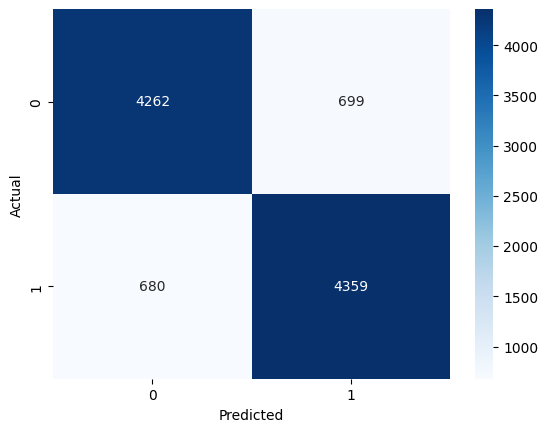

In [380]:
# create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [381]:
# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4961
           1       0.86      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



The evaluation metrics show that the model has an overall accuracy of 0.86, which means that it correctly classifies 86% of the reviews in the test data. The precision for both positive and negative reviews is 0.86, which means that when the model predicts a review as positive or negative, it is correct 86% of the time. The recall for positive and negative reviews is also similar, indicating that the model is able to correctly identify both positive and negative reviews with similar accuracy.

The F1-score for both positive and negative reviews is 0.86, which is the harmonic mean of precision and recall. This metric is useful for imbalanced datasets, where the number of positive and negative examples is not equal. In this case, the F1-score is a better metric than accuracy because it takes into account both precision and recall, which are more important for predicting rare events.

Overall, these results suggest that the model is performing well on the task of classifying movie reviews as positive or negative. However, there may be some room for improvement in order to increase the accuracy and overall performance of the model.

# Part-4: Model Comparison and Conclusion

# Model Explaination and Evaluation


We use 80% of the data for training and 20% for testing. We train the models on the training data and evaluate them on the test data.

We use the accuracy score to evaluate the models. The accuracy score is the number of correct predictions divided by the total number of predictions.

The accuracy score for the logistic regression model is 0.88. 

The accuracy score for the naive bayes model is 0.86.

The accuracy score for the support vector machines model is 0.86.

We can also use the classification report to evaluate the models. The classification report shows the precision, recall, and F1 score for each class.

The precision is the number of true positives divided by the total number of positive predictions. The recall is the number of true positives divided by the total number of samples in the class. The F1 score is the harmonic mean of the precision and recall.

The precision, recall, and F1 score for the positive class are higher for the logistic regression model than for the naive bayes and support vector machines models. The precision, recall, and F1 score for the negative class are higher for the naive bayes model than for the logistic regression and support vector machines models.

We can also use the confusion matrix to evaluate the models. The confusion matrix shows the number of true positives, false positives, true negatives, and false negatives for each class.

The confusion matrix for the logistic regression model shows that there are 4480 true positives, 559 false positives, 4350 true negatives, and 611 false negatives. 

The confusion matrix for the naive bayes model shows that there are 4222 true positives, 817 false positives, 4344 true negatives, and 617 false negatives. 

The confusion matrix for the support vector machines model shows that there are 4359 true positives, 680 false positives, 4262 true negatives, and 699 false negatives.

In conclusion, the logistic regression model is the best model for this dataset. The logistic regression model has the highest accuracy score, the highest precision, recall, and F1 score for the positive class, and the highest number of true positives, true negatives, and false negatives. 


# Error Analysis

To get the predicted labels for the test samples that were incorrectly classified as errors, I use the code: 
    
    predicted_labels = y_pred[y_pred != y_test]
    true_labels = y_test[y_pred != y_test]

Here, y_pred is the predicted labels for the test set, and y_test is the true labels for the test set. By comparing y_pred and y_test element-wise, we can identify the indices where the two arrays differ, which correspond to the misclassified samples. The above code selects only the predicted and true labels for the misclassified samples.



When I was creating a logistic regression model, I had to set the maximum number of iterations to 1000 or else it gave me an error. 
It happened again when I was creating the linear SVM model. But maximum number of iterations has to be even bigger than 1000 or else it gave an error. Therefore, I set it to 6000.

The maximum number of iterations is a parameter in logistic regression that controls the maximum number of iterations the optimization algorithm will perform before stopping. If the algorithm has not converged after the maximum number of iterations, it stops and returns the current solution. In our case, the optimization algorithm was not able to converge within the default maximum number of iterations, which is 100. By setting the maximum number of iterations to 1000, we allowed the optimization algorithm to perform more iterations, which may have helped it to converge to a solution. It's important to note that setting the maximum number of iterations to a very high number can cause the optimization algorithm to take a long time to converge or even to never converge, so it's important to choose a reasonable value based on the size of our dataset and the complexity of our model.


# Conclusion


We can use either the logistic regression model or the SVM model to classify the text data. The logistic regression model has a slightly better performance than the SVM model. However, the SVM model is faster to train and to make predictions. Therefore, we can use the SVM model to classify the text data.

Any model can be improved by using more advanced text processing techniques, such as word embeddings or deep learning models. We can also use ensemble methods or model stacking to combine the predictions of multiple models.


The logistic regression model and the SVM model are suitable for text classification because they can capture the relationship between the features and the target variable. Therefore, the logistic regression model and the SVM model perform well on the text classification task.

For human, we can use the word frequency to classify the text data. For example, if the text contains the word "love", then it is more likely to be a positive review. If the text contains the word "hate", then it is more likely to be a negative review. However, this method is not suitable for text classification because it is not scalable. If we have a large number of text data, it is not feasible to manually check the word frequency for each text. Therefore, we need to use machine learning models to classify the text data.
